In [1]:
import numpy as np
import torch

from botorch.utils.multi_objective import Hypervolume
from scipy.spatial.distance import euclidean

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["mathtext.fontset"] = "stix"
matplotlib.rcParams["font.family"] = "STIXGeneral"
matplotlib.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}\usepackage{amssymb}"

In [2]:
def quad_fn(y, c, d, n=100):
    q1 = y[0, 0] - y[1, 0]
    q2 = y[0, 1] - y[1, 1]
    r = euclidean(y[0, :], y[1, :])
    x = np.linspace(-r / 2, r / 2, n)

    z = np.column_stack([x, c * x**d + c])
    angle = np.arcsin(r / q2 / 2)
    theta = -angle
    rotation_matrix = np.array(
        [[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]]
    )

    bias = y[0, :] - z[0, :] @ rotation_matrix
    rz = z @ rotation_matrix + bias

    return rz


y = np.array([[0.4, 1], [1, 0.4]])
n = 100
true_pf = quad_fn(y, -1, 2, n)


def plot_qualities(y1, y2, title, label1, label2):
    fig = plt.figure(figsize=(5, 5))
    plt.plot(true_pf[:, 0], true_pf[:, 1], linewidth=5, color="k", label="Pareto front")

    plt.scatter(
        high[:, 0],
        high[:, 1],
        marker="o",
        color="None",
        s=200,
        edgecolor="crimson",
        zorder=5,
        linewidth=3,
        label=label1,
    )

    plt.scatter(
        low[:, 0],
        low[:, 1],
        marker="X",
        color="dodgerblue",
        s=200,
        zorder=5,
        linewidth=0.75,
        edgecolor="k",
        label=label2,
    )

    high_pf_x = np.concatenate([np.zeros(1), high[:, 0], np.array([high[-1, 0]])])
    high_pf_y = np.concatenate([np.array([high[0, 1]]), high[:, 1], np.zeros(1)])
    plt.step(
        high_pf_x, high_pf_y, color="crimson", linestyle="--", alpha=0.2, linewidth=3
    )

    low_pf_x = np.concatenate([np.zeros(1), low[:, 0], np.array([low[-1, 0]])])
    low_pf_y = np.concatenate([np.array([low[0, 1]]), low[:, 1], np.zeros(1)])
    plt.step(
        low_pf_x, low_pf_y, color="dodgerblue", linestyle="--", alpha=0.2, linewidth=3
    )

    plt.xlim([0, 1.05])
    plt.ylim([0, 1.05])
    plt.xticks([], fontsize=15)
    plt.yticks([], fontsize=15)
    plt.xlabel(r"$y^{(1)}$", fontsize=30)
    plt.ylabel(r"$y^{(2)}$", fontsize=30)
    plt.title(title, fontsize=30)
    plt.legend(fontsize=18, loc="lower left")
    plt.show()
    return fig

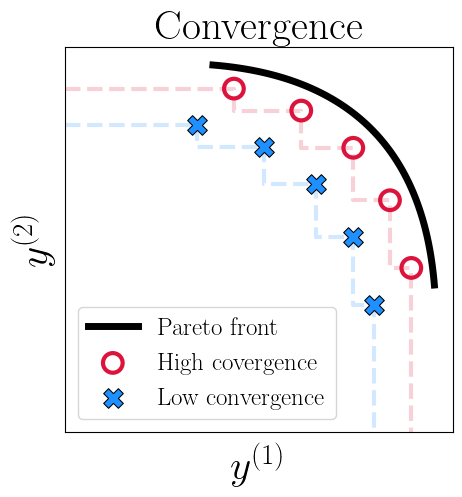

In [3]:
high_convergence = true_pf - 0.05
low_convergence = true_pf - 0.15
k = 5

high = high_convergence[np.linspace(10, n - 10, k).astype(int)]
low = low_convergence[np.linspace(10, n - 10, k).astype(int)]
fig = plot_qualities(high, low, "Convergence", "High covergence", "Low convergence")

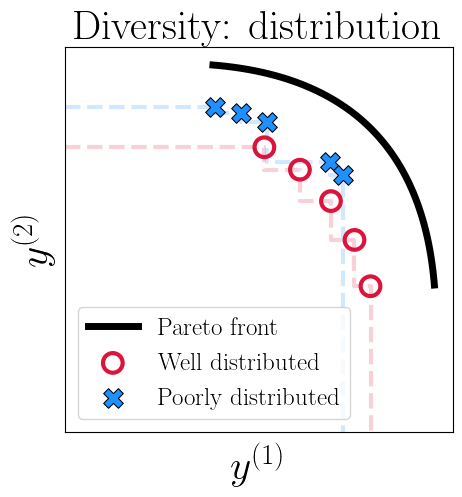

In [4]:
high_distribution = true_pf - 0.15
low_distribution = true_pf - 0.1
k = 5

high = high_distribution[np.linspace(30, n - 15, k).astype(int)]
ind = np.array([10, 17, 25, 48, 54])
low = low_distribution[ind]

fig = plot_qualities(
    high, low, "Diversity: distribution", "Well distributed", "Poorly distributed"
)

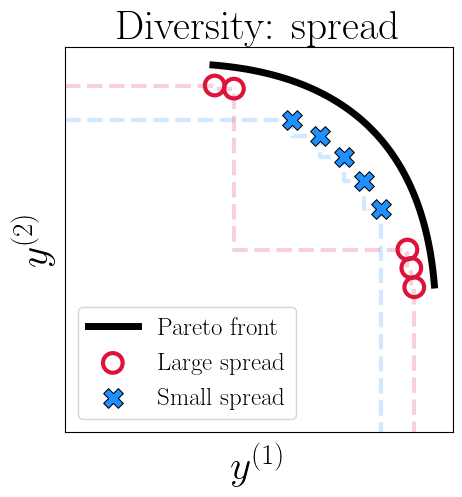

In [5]:
high_spread = true_pf - 0.05
low_spread = true_pf - 0.075
k = 5

ind = np.array([5, 10, 85, 90, 95])
high = high_spread[ind]
low = low_spread[np.linspace(30, n - 30, k).astype(int)]

fig = plot_qualities(high, low, "Diversity: spread", "Large spread", "Small spread")

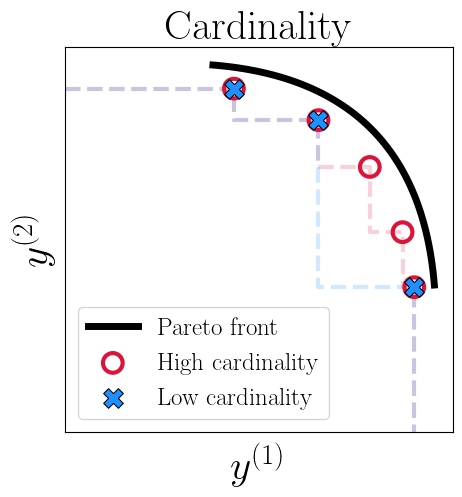

In [6]:
high_cardinality = true_pf - 0.05
low_cardinality = true_pf - 0.05
k = 5

ind = np.array([10, 36, 58, 80, 95])
high = high_cardinality[ind]
ind = np.array([10, 36, 95])
low = low_cardinality[ind]
fig = plot_qualities(high, low, "Cardinality", "High cardinality", "Low cardinality")